In [1]:
import os
import sys
import pandas as pd
import numpy as np
import pybedtools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
expect_table = pd.read_csv('../../data/simulate_cov.table', sep="\t", header=None)

In [3]:
expect_table.columns = ['round', 'TE_5mCpG', 'CDS_5mCpG', '3UTR_5mCpG','5UTR_5mCpG']

In [4]:
#For how the observation is generated, please refer to the script `permutation_test.ipynb`
Obs_TE = 0.4652363315847668
Obs_CDS = 0.00903536370007927
Obs_3UTR = 0.014709657367071626
Obs_5UTR = 0.013905576678070942

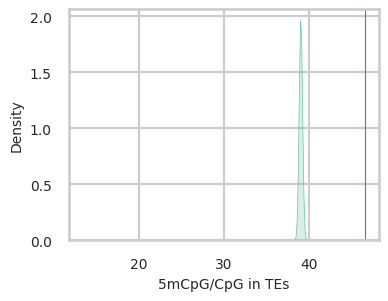

In [5]:
#Plot distribution of 5mCpG in TE with the expectation
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(4, 3))
sns.kdeplot(expect_table['TE_5mCpG']*100, label='Expectation', fill=True, linewidth=0.5)
plt.xlabel('5mCpG/CpG in TEs', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axvline(x=Obs_TE*100, color='r', label='Observation', linewidth=0.8)



In [28]:
print(expect_table['TE_5mCpG'].mean()*100)
print(expect_table['CDS_5mCpG'].mean()*100)
print(expect_table['3UTR_5mCpG'].mean()*100)
print(expect_table['5UTR_5mCpG'].mean()*100)


38.9381289014128
4.955630951467846
3.059295298473617
3.7149759960006343


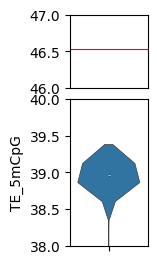

In [74]:
from matplotlib import gridspec

# Create figure
fig = plt.figure(figsize=(1, 3))

# Create GridSpec object - the ratio numbers control relative heights
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])  # First plot takes 1 unit, second takes 2 units

# Create subplots using the GridSpec
ax2 = fig.add_subplot(gs[0])  # Smaller plot on top
ax1 = fig.add_subplot(gs[1])  # Larger plot on bottom

# Add your plots
sns.violinplot(expect_table['TE_5mCpG']*100, ax=ax1, linewidth=0.5)
ax1.set_ylim(38, 40)
ax2.set_ylim(46, 47)
ax2.axhline(y=Obs_TE*100, color='r', label='Observation', linewidth=0.8)
ax2.set_xlabel('5mCpG (%)')
ax2.xaxis.set_visible(False)
# Adjust spacing between plots
plt.subplots_adjust(hspace=0.1)
plt.savefig('TE_5mCpG_permutation.svg')
plt.show()


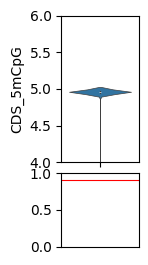

In [90]:
from matplotlib import gridspec

# Create figure
fig = plt.figure(figsize=(1, 3))

# Create GridSpec object - the ratio numbers control relative heights
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # First plot takes 1 unit, second takes 2 units

# Create subplots using the GridSpec
ax2 = fig.add_subplot(gs[1])  
ax1 = fig.add_subplot(gs[0])  

# Add your plots
sns.violinplot(expect_table['CDS_5mCpG']*100, ax=ax1, linewidth=0.5)
ax1.set_ylim(4, 6)
ax2.set_ylim(0, 1)
ax2.axhline(y=Obs_CDS*100, color='r', label='Observation', linewidth=0.8)
ax2.set_xlabel('5mCpG (%)')
ax2.xaxis.set_visible(False)
# Adjust spacing between plots
plt.subplots_adjust(hspace=0.1)
plt.savefig('CDS_5mCpG_permutation.svg')
plt.show()

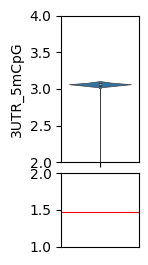

In [78]:
from matplotlib import gridspec

# Create figure
fig = plt.figure(figsize=(1, 3))

# Create GridSpec object - the ratio numbers control relative heights
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # First plot takes 1 unit, second takes 2 units

# Create subplots using the GridSpec
ax2 = fig.add_subplot(gs[1])  
ax1 = fig.add_subplot(gs[0])  

# Add your plots
sns.violinplot(expect_table['3UTR_5mCpG']*100, ax=ax1, linewidth=0.5)
ax1.set_ylim(2, 4)
ax2.set_ylim(1, 2)
ax2.axhline(y=Obs_3UTR*100, color='r', label='Observation', linewidth=0.8)
ax2.set_xlabel('5mCpG (%)')
ax2.xaxis.set_visible(False)
# Adjust spacing between plots
plt.subplots_adjust(hspace=0.1)
plt.savefig('3UTR_5mCpG_permutation.svg')
plt.show()

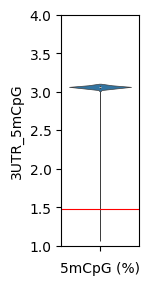

In [87]:
plt.figure(figsize=(1, 3))
sns.violinplot(expect_table['3UTR_5mCpG']*100, linewidth=0.5)
plt.ylim(1, 4)
plt.axhline(y=Obs_3UTR*100, color='r', label='Observation', linewidth=0.8)
plt.xlabel('5mCpG (%)')  # Corrected xlabel method
plt.savefig('3UTR_5mCpG_permutation.svg')
plt.show()

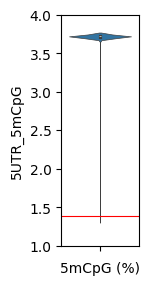

In [88]:
plt.figure(figsize=(1, 3))
sns.violinplot(expect_table['5UTR_5mCpG']*100, linewidth=0.5)
plt.ylim(1, 4)
plt.axhline(y=Obs_5UTR*100, color='r', label='Observation', linewidth=0.8)
plt.xlabel('5mCpG (%)')  # Corrected xlabel method
plt.xticks(size=0)
plt.savefig('5UTR_5mCpG_permutation.svg')
plt.show()

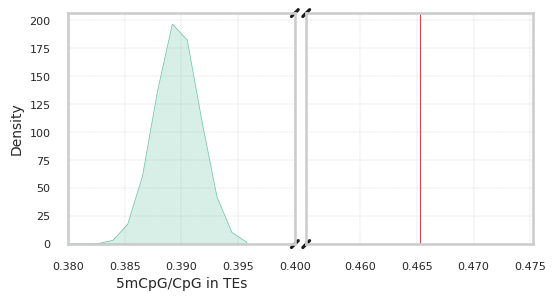

In [83]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6, 3))
f.subplots_adjust(wspace=0.05)
sns.kdeplot(expect_table['TE_5mCpG'], ax=ax1, label='Expectation', fill=True, linewidth=0.5)
ax1.set_xlim(0.38, 0.40)
#add bar plot
ax2.set_xlim(Obs_TE-0.01, Obs_TE+0.01)
ax2.axvline(x=Obs_TE, color='r', label='Observation', linewidth=0.8)
d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d), (1-d,1+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d), (-d,+d), **kwargs)
ax2.plot((-d,+d), (1-d,1+d), **kwargs)

# Labels
plt.xlabel('5mCpG (%)')
ax1.set_ylabel('Density', fontsize=10)

# Remove right y-axis label from right subplot
ax1.set_xlabel('5mCpG/CpG in TEs', fontsize=10)
ax2.set_xlabel('')
#change the font size of the ticks
ax1.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)
ax1.set_facecolor("white")
ax2.set_facecolor("white")
for ax in [ax1, ax2]:
    ax.grid(True, linestyle='--', linewidth=0.3)
plt.show()

In [33]:
#Calculate p-value for TE
p_TE = (expect_table['TE_5mCpG'] >= Obs_TE).sum() / len(expect_table)
print('p-value for TE:', p_TE)


p-value for TE: 0.0


In [39]:
observed = np.float64(Obs_TE)
expected_values = np.float64(expect_table['TE_5mCpG'])

# Calculate mean and standard deviation
mean = np.mean(expected_values)
std = np.std(expected_values)

# Calculate z-score
z_score = (observed - mean) / std

# Use scipy.stats for better numerical precision
from scipy import stats
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# If p-value is very small, use log p-value
if p_value < 1e-300:  # If extremely small
    log_p_value = stats.norm.logsf(abs(z_score)) + np.log(2)
    print(f"Log p-value: {log_p_value:.2f}")
else:
    print(f"P-value: {p_value:.2e}")

Log p-value: -48.89


In [35]:
p_CDS = (expect_table['CDS_5mCpG'] <= Obs_CDS).sum() / len(expect_table)
print('p-value for CDS:', p_CDS)

p-value for CDS: 0.0


In [36]:
p_3UTR = (expect_table['3UTR_5mCpG'] <= Obs_3UTR).sum() / len(expect_table)
print('p-value for 3UTR:', p_3UTR)


p-value for 3UTR: 0.001


In [37]:
p_5UTR = (expect_table['5UTR_5mCpG'] <= Obs_5UTR).sum() / len(expect_table)
print('p-value for 5UTR:', p_5UTR)


p-value for 5UTR: 0.001


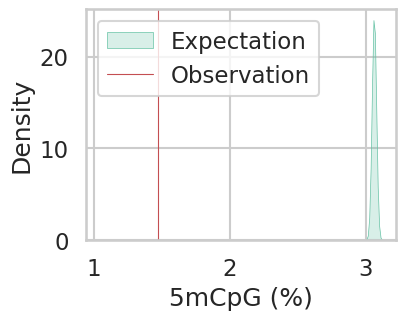

In [38]:
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")
plt.figure(figsize=(4, 3))
sns.kdeplot(expect_table['3UTR_5mCpG']*100, label='Expectation', fill=True, linewidth=0.5)
plt.xlabel('5mCpG (%)')
plt.axvline(x=Obs_3UTR*100, color='r', label='Observation', linewidth=0.8)
plt.legend()

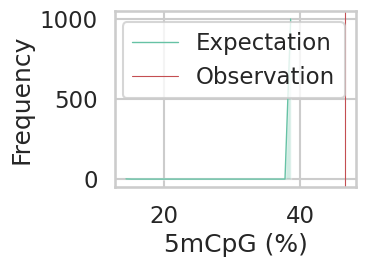

In [32]:
counts, bins = np.histogram(expect_table['TE_5mCpG']*100, bins=30)

# Calculate bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create the plot
plt.figure(figsize=(4, 3))
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("Set2")

# Plot the line
plt.plot(bin_centers, counts, label='Expectation', linewidth=1)

# Add fill under the line
plt.fill_between(bin_centers, counts, alpha=0.3)

plt.xlabel('5mCpG (%)')
plt.ylabel('Frequency')

# Add the observation line
plt.axvline(x=Obs_TE*100, color='r', label='Observation', linewidth=0.8)
plt.legend()

plt.tight_layout()